# Ficha de trabalho - Clustering e redução dimensionalidade
Ficheiros a usar: 
* wines.csv - ficheiro com os dados das análises
* wines_labels.csv - labels das classes


**Sumário:**

A data frame containing 177 rows and thirteen columns. These data are the results of chemical analyses of wines grown in the same region in Italy (Piedmont) but derived from three different cultivars (classes).


In [3]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage

1 - Importa os dados presentes nos dois ficheiros.

In [4]:
wines = pd.read_csv(r'C:\Users\Tiago\GitHub\Repositorio de Sistemas\Repositorio-Sistemas\datasets\wines.csv',sep=',', index_col = 0)
wines_lables = pd.read_csv(r'C:\Users\Tiago\GitHub\Repositorio de Sistemas\Repositorio-Sistemas\datasets\wines_labels.csv',sep=',', index_col = 0)
wines.head()


,alcohol,malic acid,ash,ash alkalinity,magnesium,tot. phenols,flavonoids,non-flav. phenols,proanth,col. int.,col. hue,OD ratio,proline
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


2 - Explora o dataset, indicando:
 * o número de amostras e atributos, 
 * tipos de dados, 
 * se há valores em falta.

In [5]:
print(f"O numero de amostras e atributos do wines.csv é: {wines.shape}")
print(f"O numero de amostras e atributos do wines_labels.csv é: {wines_lables.shape}")
print("\nTipos de dados:")
print(wines.dtypes, "\n")
print("Numero de valores em falta:")
print(wines.isnull().values.sum())

O numero de amostras e atributos do wines.csv é: (177, 13)
O numero de amostras e atributos do wines_labels.csv é: (177, 1)

Tipos de dados:
alcohol              float64
malic acid           float64
ash                  float64
ash alkalinity       float64
magnesium              int64
tot. phenols         float64
flavonoids           float64
non-flav. phenols    float64
proanth              float64
col. int.            float64
col. hue             float64
OD ratio             float64
proline                int64
dtype: object 

Numero de valores em falta:
0


3 - Verifica se as amostras provenientes das classes "Barolo" e "Barbera" têm níveis de alcool significativamente diferentes. 

In [6]:
barolo_wines = wines[wines_lables["x"] == "Barolo"]
stat, p = stats.shapiro(barolo_wines["alcohol"])
print(f"O pvalue de barolo é de {p} logo são significativamente diferentes")
barbera_wines = wines[wines_lables["x"] == "Barbera"]
stat, p = stats.shapiro(barbera_wines["alcohol"])
print(f"O pvalue de barbera é de {p} logo são significativamente diferentes")

O pvalue de barolo é de 0.5255346894264221 logo são significativamente diferentes
O pvalue de barbera é de 0.6408318877220154 logo são significativamente diferentes


4 - Efectua uma análise semelhante à anterior mas considerando também a classe “Grignolino”. 

In [7]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.stats.multicomp as multi

df = wines.join(wines_lables['x'])
lm = ols("df.alcohol~df.x", df).fit()

print(anova_lm(lm), "\n")

mcDate = multi.MultiComparison(df.alcohol,df.x)
Results = mcDate.tukeyhsd()
print(Results)

             df     sum_sq    mean_sq           F        PR(>F)
df.x        2.0  69.514462  34.757231  132.569148  1.050680e-35
Residual  174.0  45.619651   0.262182         NaN           NaN 

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2   meandiff p-adj  lower   upper  reject
--------------------------------------------------------
Barbera     Barolo   0.5826   0.0  0.3464  0.8188   True
Barbera Grignolino   -0.875   0.0 -1.1012 -0.6488   True
 Barolo Grignolino  -1.4576   0.0 -1.6719 -1.2434   True
--------------------------------------------------------


5 - Realiza um PCA e determine quantos componentes principais são necessários para explicar 90% da variabilidade dos dados. Representa os scores num gráfico onde as cores dos pontos variam consoante a classe a que a amostra pertence. O que conclui em relação à discriminação das respetivas classes?

[0.35983071 0.1924128  0.1117946  0.07111109 0.06628744 0.04960367
 0.04246014 0.02697991 0.02224462 0.01898528 0.01734155 0.01295206
 0.00799613]


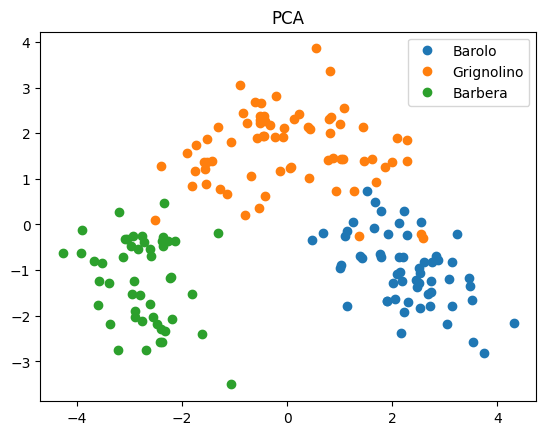

In [14]:
from sklearn.decomposition import PCA

wines_scaled = preprocessing.scale(wines)
n = 13 
pca_df = PCA(n_components=n)
pca_df.fit(wines_scaled)
x_reduced = pca_df.transform(wines_scaled)

print(pca_df.explained_variance_ratio_)

for casta in wines_lables.x.unique():
    index_samples = wines_lables.index[wines_lables.x==casta]-1 # -1 porque a indexação dos arrays começa em 0 e as labels do atributo index no dataframe começa em 1.
    plt.plot(x_reduced[index_samples,0],x_reduced[index_samples,1], 'o' , label=casta)
plt.title("PCA")
plt.legend(loc='best', shadow=False)
plt.show()



6 - Realizar clustering hierarquico dos dados, utilizando a métrica de distância "Manhattan”. Apresenta a àrvore resultante colorindo as folas de acordo com a classe. O que conclui olhando para os resultados?


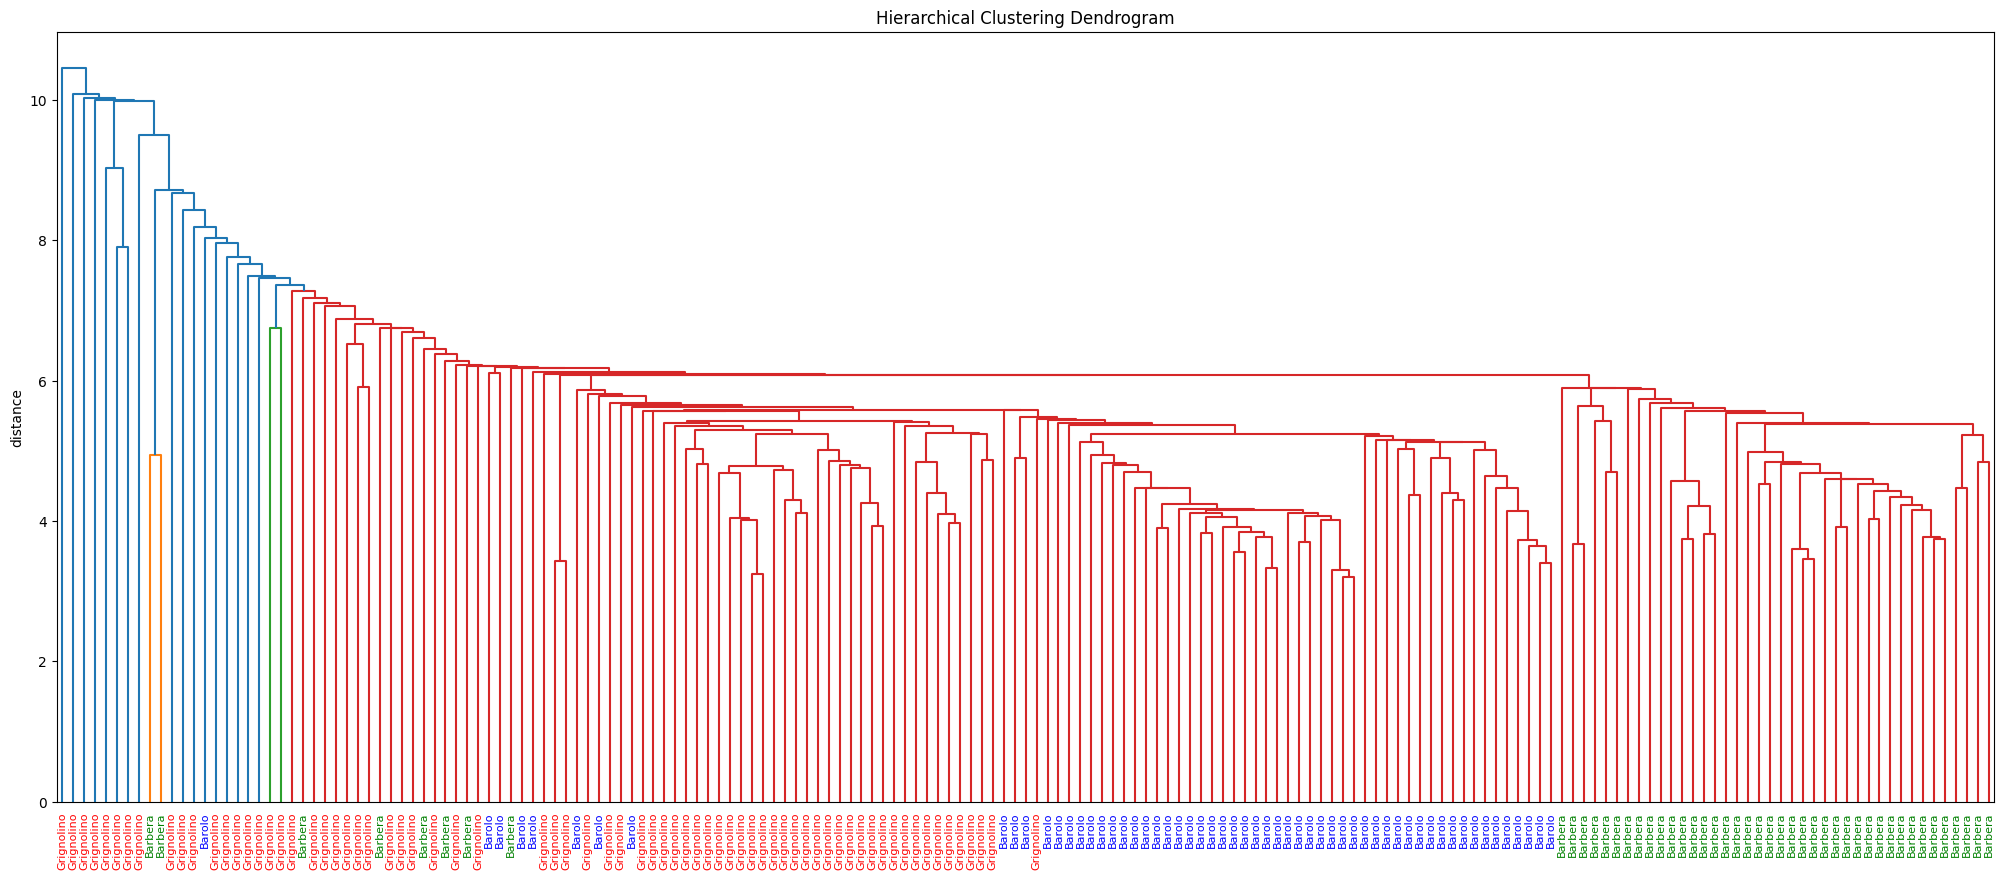

In [19]:
z = linkage(wines_scaled, metric="cityblock")

plt.figure(figsize=(25, 10))
dendrogram(
    z,
    labels=list(wines_lables['x']),
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)

plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('distance')

# Assignment of colors to labels: 'a' is red, 'b' is green, etc.
label_colors = {'Barolo': 'b', 'Grignolino': 'r', 'Barbera': 'g'}
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

plt.show()

7 - Aplica a função de clustering k-means aos dados, com k =3, e compara os resultados com os presentes na variavel *wines_labels*. O que conclui desta análise? Cruze os resultados com os obtidos anteriormente.

In [20]:
from sklearn.cluster import KMeans

k=3
kmeans = KMeans(n_clusters=k, max_iter=1000)
kmeans.fit(wines_scaled)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

pd.crosstab(labels, wines_lables["x"], rownames=['clusters'] )

x,Barbera,Barolo,Grignolino
clusters,,,
0,0,58,3
1,48,0,3
2,0,0,65
